In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
preprocessed_data = {}
filesDatas = []
data = {1:{'train': 'train.csv'}}
for k, v in data.items():
    for file_name, file_content in v.items():
        pb_data = pd.read_csv(file_content)
        input_data = np.array(pb_data.get_values()[:,0:18], dtype=np.float32)
        print(file_name, input_data.shape)
        filesDatas.append(input_data)

filesDatas = np.concatenate(filesDatas, axis=0)
filesDatas = np.array(filesDatas, dtype=np.float32).reshape(-1, 18)

preprocessed_data['myInput'] = filesDatas
print("preprocessed_data[\'myInput\'].shape = ", preprocessed_data['myInput'].shape)


train (12011833, 18)
preprocessed_data['myInput'].shape =  (12011833, 18)


In [3]:
origin_data = pd.DataFrame(preprocessed_data['myInput'])
data = origin_data
data.columns = ['Cell Index','Cell X','Cell Y','Height','Azimuth','Electrical Downtilt','Mechanical Downtilt',
                'Frequency Band','RS Power','Cell Altitude','Cell Building Height','Cell Clutter Index',
                'X','Y','Altitude','Building Height','Clutter Index','RSRP']
data.shape

(12011833, 18)

In [4]:
'''
data = data[data['Height'] != 0]
## 垂直下倾角
data['downtilt'] = data['Electrical Downtilt'] + data['Mechanical Downtilt']
## 水平差角
data['h_theta'] = 90 - np.rad2deg(np.arctan2(data['Y'] - data['Cell Y'], data['X'] - data['Cell X'])) - data['Azimuth']
data['h_theta'] = np.where(data['h_theta'] > 180, data['h_theta'] - 360, data['h_theta'])
data['h_theta'] = np.where(data['h_theta'] > 180, data['h_theta'] - 360, data['h_theta'])
data['h_theta'] = np.where(data['h_theta'] < -180, data['h_theta'] + 360, data['h_theta'])
data['h_theta'] = np.where(data['h_theta'] < -180, data['h_theta'] + 360, data['h_theta'])
# data = data[np.abs(data['h_theta']) < 90]
data['distance'] = ((data['X'] - data['Cell X']) ** 2 + (data['Y'] - data['Cell Y']) ** 2) ** 0.5
data = data[data['distance'] * np.cos(np.deg2rad(data['h_theta'])) <= data['Height'] / np.tan(np.deg2rad(data['downtilt'])) * 1.5]
# data = data[data['distance'] * np.cos(np.deg2rad(data['h_theta'])) <= 500]
## 相对海拔高度
data['delta_altitude'] = data['Altitude'] - data['Cell Altitude']
## deltaHv
data['deltaHv'] = data['Height'] - np.tan(np.deg2rad(data['downtilt'])) * data['distance'] * np.cos(np.deg2rad(data['h_theta']))
## 垂线距离
data['direct_distance'] = ((np.abs(data['deltaHv']) * np.cos(np.deg2rad(data['downtilt']))) ** 2 + (data['distance'] * np.sin(np.deg2rad(data['h_theta']))) ** 2) ** 0.5
## 传播距离
data['pass_distance'] = (np.abs(data['deltaHv'] ** 2 + data['distance'] ** 2 - data['direct_distance'] ** 2)) ** 0.5
data.shape

data['Height'] = np.log10(data['Height'])

data['Frequency Band'] = np.log10(data['Frequency Band'])

data = data[data['distance'] != 0]
data['distance'] = np.log10(data['distance'])

data = data[data['direct_distance'] != 0]
data['direct_distance'] = np.log10(data['direct_distance'])

data = data[data['pass_distance'] != 0]
data['pass_distance'] = np.log10(data['pass_distance'])

## cost231Hata
# data['cost231Hata'] = 46.3 + 33.9 * data['Frequency Band'] - 13.82 * data['Height'] + (44.9 - 6.55 * data['Frequency Band']) * data['distance']

# data = data.drop(['Frequency Band', 'RS Power', 'Cell Index', 'Cell X', 'Cell Y', 'Azimuth', 'Electrical Downtilt', 'Mechanical Downtilt', 'X', 'Y', 'Altitude', 'Cell Altitude', 'h_theta', 'downtilt'], axis = 1)
data['Cell Building Height'] = np.where(data['Cell Building Height'] > 0, 1, 0)
data['Building Height'] = np.where(data['Building Height'] > 0, 1, 0)
data.head()
'''

"\ndata = data[data['Height'] != 0]\n## 垂直下倾角\ndata['downtilt'] = data['Electrical Downtilt'] + data['Mechanical Downtilt']\n## 水平差角\ndata['h_theta'] = 90 - np.rad2deg(np.arctan2(data['Y'] - data['Cell Y'], data['X'] - data['Cell X'])) - data['Azimuth']\ndata['h_theta'] = np.where(data['h_theta'] > 180, data['h_theta'] - 360, data['h_theta'])\ndata['h_theta'] = np.where(data['h_theta'] > 180, data['h_theta'] - 360, data['h_theta'])\ndata['h_theta'] = np.where(data['h_theta'] < -180, data['h_theta'] + 360, data['h_theta'])\ndata['h_theta'] = np.where(data['h_theta'] < -180, data['h_theta'] + 360, data['h_theta'])\n# data = data[np.abs(data['h_theta']) < 90]\ndata['distance'] = ((data['X'] - data['Cell X']) ** 2 + (data['Y'] - data['Cell Y']) ** 2) ** 0.5\ndata = data[data['distance'] * np.cos(np.deg2rad(data['h_theta'])) <= data['Height'] / np.tan(np.deg2rad(data['downtilt'])) * 1.5]\n# data = data[data['distance'] * np.cos(np.deg2rad(data['h_theta'])) <= 500]\n## 相对海拔高度\ndata['delta_al

In [5]:
data.shape

(12011833, 18)

In [6]:
data['Height'] = np.where(data['Height'] == 0, 22, data['Height'])
data['downtilt'] = data['Electrical Downtilt'] + data['Mechanical Downtilt']
data['h_theta'] = 90 - np.rad2deg(np.arctan2(data['Y'] - data['Cell Y'], data['X'] - data['Cell X'])) - data['Azimuth']
data['h_theta'] = np.where(data['h_theta'] > 180, data['h_theta'] - 360, data['h_theta'])
data['h_theta'] = np.where(data['h_theta'] > 180, data['h_theta'] - 360, data['h_theta'])
data['h_theta'] = np.where(data['h_theta'] < -180, data['h_theta'] + 360, data['h_theta'])
data['h_theta'] = np.where(data['h_theta'] < -180, data['h_theta'] + 360, data['h_theta'])
data['distance'] = ((data['X'] - data['Cell X']) ** 2 + (data['Y'] - data['Cell Y']) ** 2) ** 0.5
data['delta_altitude'] = data['Altitude'] - data['Cell Altitude']
data['deltaHv'] = data['Height'] - np.tan(np.deg2rad(data['downtilt'])) * data['distance'] * np.cos(np.deg2rad(data['h_theta']))
data['direct_distance'] = ((np.abs(data['deltaHv']) * np.cos(np.deg2rad(data['downtilt']))) ** 2 + (data['distance'] * np.sin(np.deg2rad(data['h_theta']))) ** 2) ** 0.5
data['pass_distance'] = (np.abs(data['deltaHv'] ** 2 + data['distance'] ** 2 - data['direct_distance'] ** 2)) ** 0.5
data['Height'] = np.log10(data['Height'])
data['Frequency Band'] = np.log10(data['Frequency Band'])
data['distance'] = np.log10(data['distance'] + 1)
data['height_mul_distance'] = data['Height'] * data['distance']
data['direct_distance'] = np.log10(data['direct_distance'] + 1)
data['pass_distance'] = np.log10(data['pass_distance'] + 1)
data['Cell Building Height'] = np.where(data['Cell Building Height'] > 0, 1, 0)
data['Building Height'] = np.where(data['Building Height'] > 0, 1, 0)
data.shape

(12011833, 26)

In [7]:
data = data.drop(['Frequency Band', 'Cell Building Height', 'Cell Clutter Index', 'Clutter Index', 'Building Height', 'RS Power', 'Cell Index', 'Cell X', 'Cell Y', 'Azimuth', 'Electrical Downtilt', 'Mechanical Downtilt', 'X', 'Y', 'Altitude', 'Cell Altitude', 'downtilt'], axis = 1)
data.shape

(12011833, 9)

In [8]:
data = data.drop(['deltaHv', 'h_theta', 'delta_altitude', 'Height'], axis = 1)

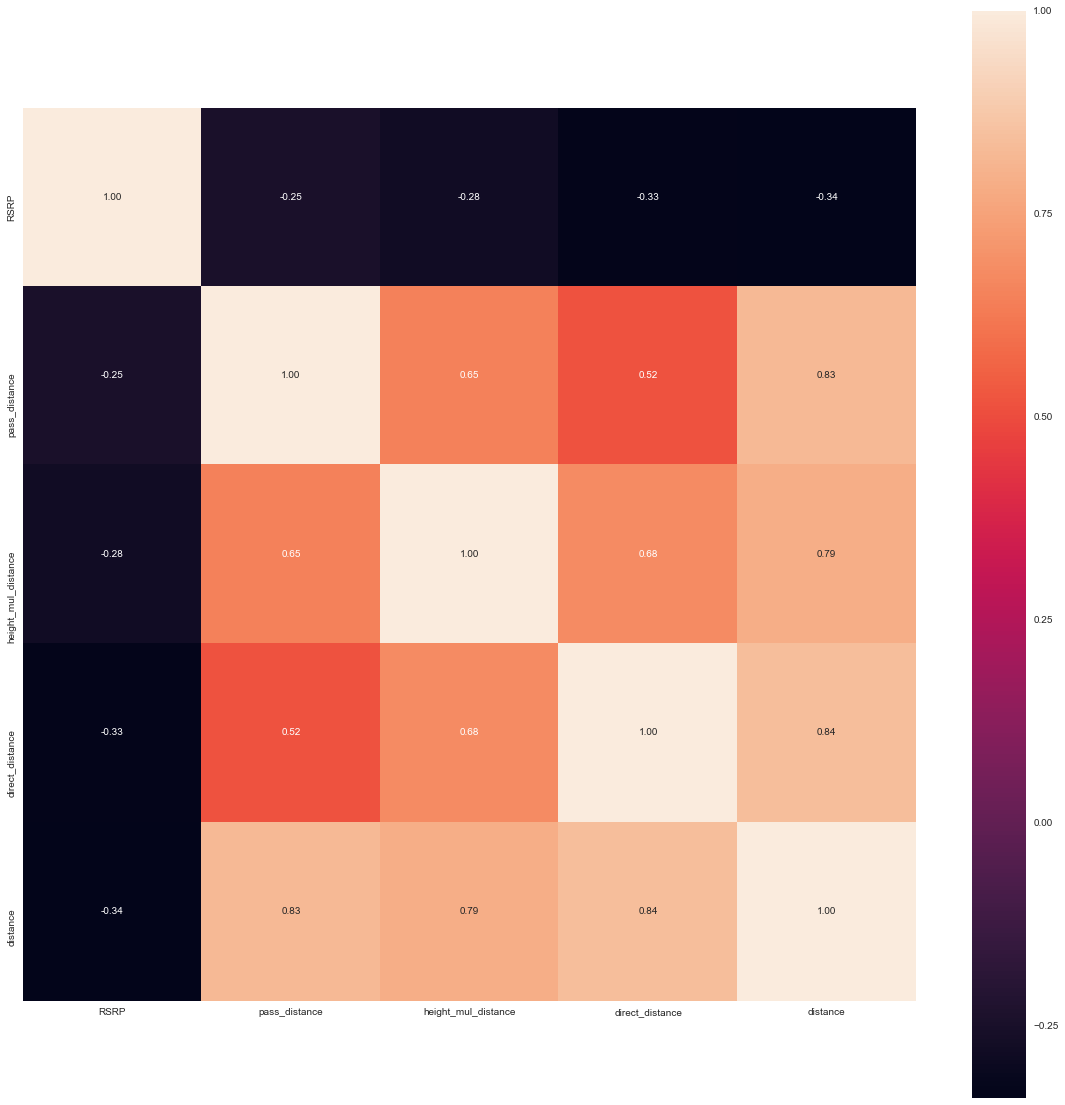

In [9]:
corrmat = data.corr()
fig = plt.figure(figsize=(20,20))
#correlation matrix
k = 50 #number of variables for heatmap
cols = corrmat.nlargest(k, 'RSRP')['RSRP'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import mean_squared_error

x_train = data.drop(['RSRP'],axis=1).iloc[:10000000]
x_test = data.drop(['RSRP'],axis=1).iloc[10000000:]
y_train = data['RSRP'].iloc[:10000000]
y_test = data['RSRP'].iloc[10000000:]

#label = data['RSRP']
#train = data.drop(['RSRP'],axis=1)
#x_train, x_test, y_train, y_test = train_test_split(train, label, test_size = 0.01, random_state = 1)
model = DecisionTreeRegressor()   #建立模型
model.fit(x_train,y_train)
y_pred = model.predict(x_test)  
score = model.score(x_test,y_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2: ",r2)

In [ ]:
data.shape

In [ ]:
def calculate_pcrr(y_true, y_pred):
    t = -103
    tp = len(y_true[(y_true < t) & (y_pred < t)])
    fp = len(y_true[(y_true >= t) & (y_pred < t)])
    fn = len(y_true[(y_true < t) & (y_pred >= t)])
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    pcrr = 2*(precision*recall)/(precision + recall)
    return pcrr
pcrr = calculate_pcrr(y_test,y_pred)  
print(pcrr)

In [ ]:
import pickle
fw = open('model_dt','wb')
pickle.dump(model,fw)
fw.close()

In [ ]:
from sklearn.externals import joblib
# joblib.dump(model, "model")
# clf = joblib.load("train_model.m")

In [ ]:
y_pred

In [ ]:
import pickle
from sklearn.externals import joblib
fr = open('model_rf','rb')
#model = pickle.load(fr)
model = joblib.load("model_rf")

In [ ]:
y_pred = model.predict(x_test)  
score = model.score(x_test,y_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
output_dict = {}
output_dict['myInput'] = y_pred

In [ ]:
x_test.shape

In [ ]:
np.array(y_pred, dtype=np.float32).reshape(-1,1).shape

In [ ]:
y_pred = np.mat(np.array(y_pred, dtype=np.float32))

In [ ]:
y_pred

In [ ]:
data.head()